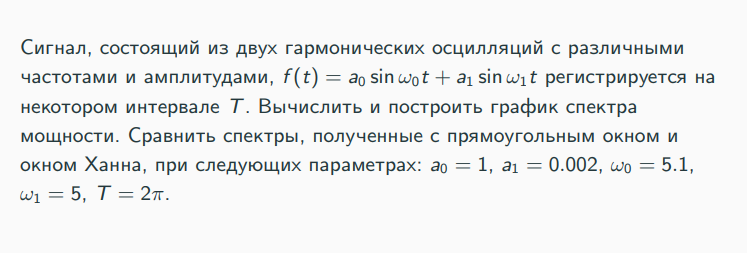

In [55]:
#imports 

import numpy as np
import matplotlib.pyplot as plt

In [56]:
a0 = 1
a1 = 0.002
omega0 = 5.1
omega1 = 5
T = 2 * np.pi
N = 1024


def task(t):
    return a0 * np.sin(omega0 * t) + a1 * np.sin(omega1 * t)

Text(0.5, 1.0, 'График функции f(t)')

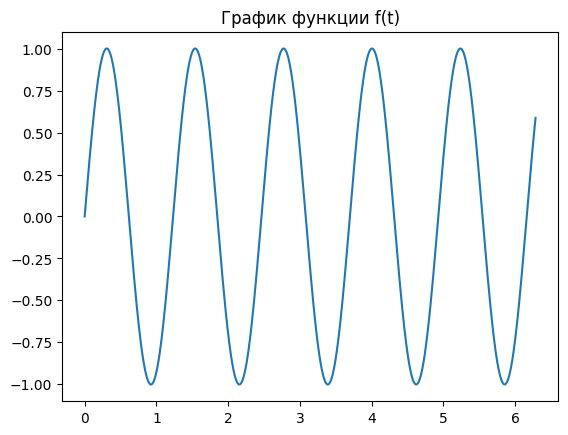

In [57]:
t = np.linspace(0, T, N)
dt = np.diff(t)[0]
plt.plot(t, task(t))
plt.title("График функции f(t)")

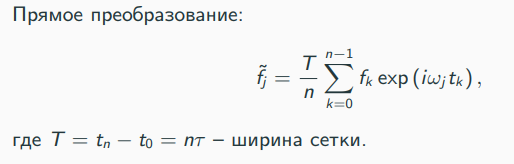  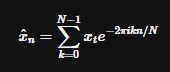 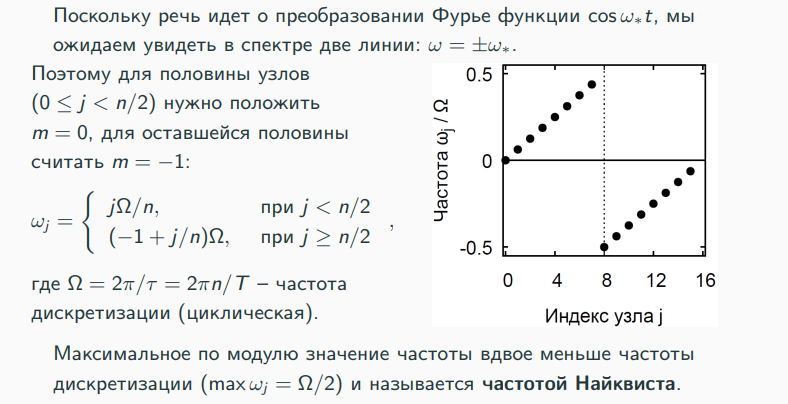

In [58]:
def fft(signal):
    N = len(signal)
    F = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            F[k] += signal[n] * np.exp(-2j * np.pi * k * n / N)
    return F

def ifft(F):
    N = len(F)
    signal = np.zeros(N, dtype=complex)
    for n in range(N):
        for k in range(N):
            signal[n] += F[k] * np.exp(2j * np.pi * k * n / N)
    return signal / N

def fftfreq(N, T):
    freq = np.zeros(N)
    for k in range(N):
        if k < N // 2:
            freq[k] = k / T
        else:
            freq[k] = (k - N) / T
    return freq

In [59]:
t = np.linspace(0, T, N, endpoint=False)
f = task(t)

# Прямоугольное окно
rect_window = np.ones(N)

# Окно Ханна
hann_window = 0.5 * (1 - np.cos(2 * np.pi * np.arange(N) / (N - 1)))

# Применение окон к сигналу
f_rect = f * rect_window
f_hann = f * hann_window

# Вычисление ДПФ для обоих сигналов
F_rect = fft(f_rect)
F_hann = fft(f_hann)

# Спектры мощности
P_rect = (np.abs(F_rect) ** 2) / N**2
P_hann = (np.abs(F_hann) ** 2) / N**2

# Вычисление частот
freq = fftfreq(N, T)

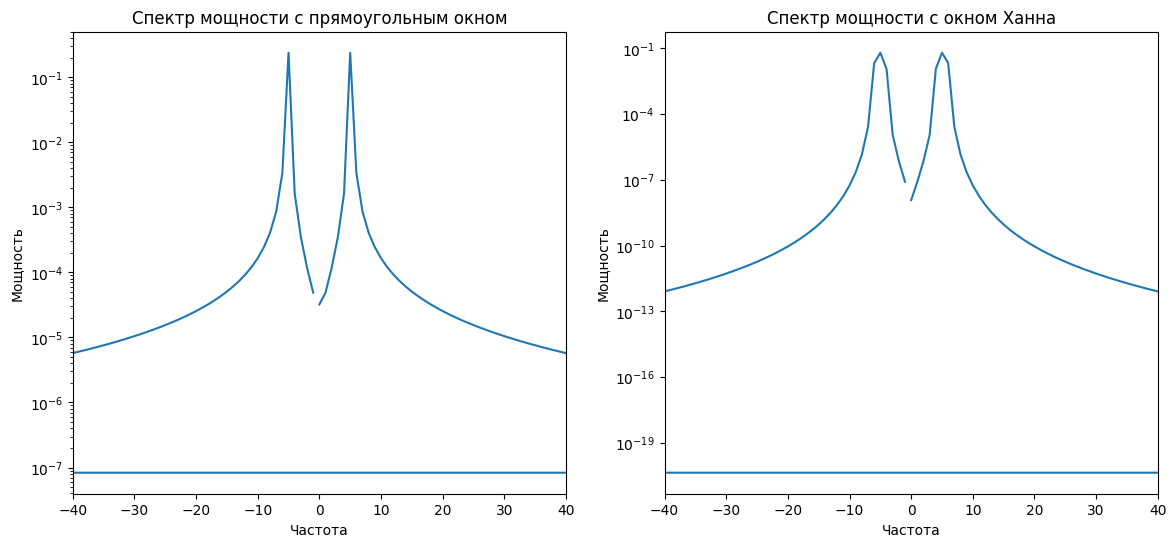

In [60]:
# Построение графиков
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(2*np.pi*freq, P_rect)
plt.xlim(-40, 40)
plt.yscale('log')
plt.title('Спектр мощности с прямоугольным окном')
plt.xlabel('Частота')
plt.ylabel('Мощность')

plt.subplot(1, 2, 2)
plt.plot(2*np.pi*freq, P_hann)
plt.xlim(-40, 40)
plt.yscale('log')
plt.title('Спектр мощности с окном Ханна')
plt.xlabel('Частота')
plt.ylabel('Мощность')

plt.show()

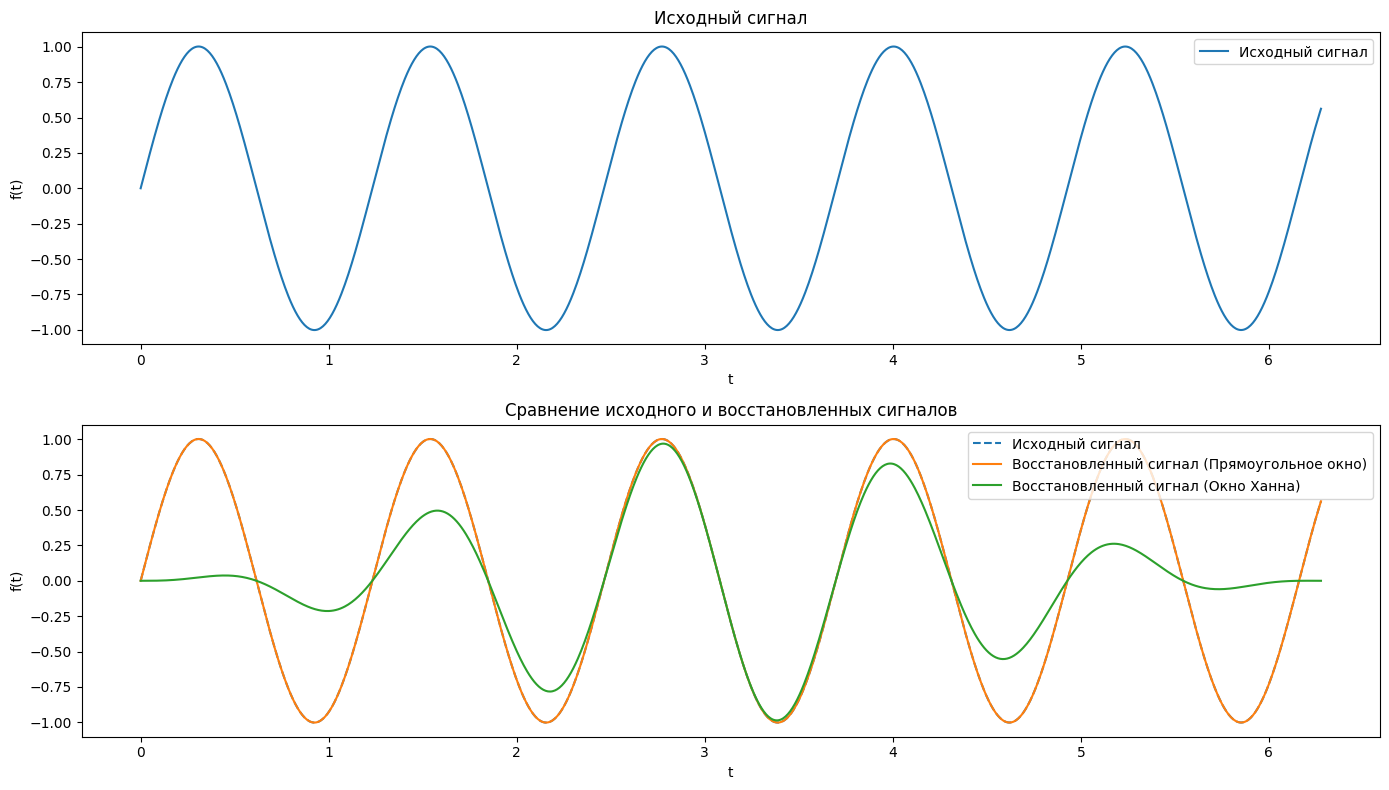

In [61]:
f_rect_reconstructed = ifft(F_rect)
f_hann_reconstructed = ifft(F_hann)

# Построение графиков
plt.figure(figsize=(14, 8))

# Исходный сигнал
plt.subplot(2, 1, 1)
plt.plot(t, f, label='Исходный сигнал')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Исходный сигнал')
plt.legend()

# Восстановленные сигналы
plt.subplot(2, 1, 2)
plt.plot(t, f, label='Исходный сигнал', linestyle='--')
plt.plot(t, f_rect_reconstructed.real, label='Восстановленный сигнал (Прямоугольное окно)')
plt.plot(t, f_hann_reconstructed.real, label='Восстановленный сигнал (Окно Ханна)')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Сравнение исходного и восстановленных сигналов')
plt.legend()

plt.tight_layout()
plt.show()